### Project Description:

The goal of this project is to predict stock prices using linear regression. Interns
will work with a historical dataset that includes various commodity prices,
volumes, and stock prices. This project will help interns understand and apply key
machine learning concepts, including Exploratory Data Analysis (EDA), feature
engineering, model development, model evaluation, and prediction system
creation.

### Problem Statement:

Develop a linear regression model to predict Amazon stock prices based on
historical commodity prices and volumes. The project will cover the entire ML
process, from EDA and feature engineering to model development and
evaluation.

###  Week1: Data Exploration and Preprocessing

### Task 1: Import and Understand Date
 1. Loadthedataset.
 
 2. Displaythefirst few rows to understand its structure.
 
 3. Checkdatatypes,missing values, and basic statistics

In [21]:
import pandas as pd

# Load the dataset from the uploaded file
file_path = '/mnt/data/Stock Market Dataset.csv'
data = pd.read_csv('Stock Market Dataset.csv')

# Display the first few rows to understand the structure
first_rows = data.head()

# Check data types, missing values, and basic statistics
data_info = data.info()
missing_values = data.isnull().sum()
basic_stats = data.describe()

first_rows, data_info, missing_values, basic_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

(   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
 0           0  02-02-2024              2.079               NaN   
 1           1  01-02-2024              2.050          161340.0   
 2           2  31-01-2024              2.100          142860.0   
 3           3  30-01-2024              2.077          139750.0   
 4           4  29-01-2024              2.490            3590.0   
 
    Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
 0            72.28             NaN        3.8215          NaN     43,194.70   
 1            73.82        577940.0        3.8535          NaN     43,081.40   
 2            75.85        344490.0        3.9060          NaN     42,580.50   
 3            77.82        347240.0        3.9110          NaN     42,946.20   
 4            76.78        331930.0        3.8790          NaN     43,299.80   
 
    Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
 0       42650.0  ...        5,89,498      

### Explanation:

##  Import and Understand Data
### 1.Dataset Overview:

1)The dataset contains 1243 entries and 39 columns, with a mix of stock prices, volumes, and commodity-related data.

2)Notable columns include various stock prices such as Amazon_Price, Apple_Price, and commodity prices like Crude_oil_Price.
### 2.Key Observations:

1)Missing values are present in columns like Natural_Gas_Vol., Crude_oil_Vol., and Platinum_Vol..

2)Some columns, such as Bitcoin_Price, Platinum_Price, and S&P_500_Price, appear to have non-numeric data types (likely due to improper formatting).
### 3.Basic Statistics:

The dataset provides statistics for numeric columns, including the mean, standard deviation, and min/max values.


###  Task 2: Exploratory Data Analysis (EDA)
1. Visualize the distribution of the target variable (Amazon_Price).

2. Analyzerelationships between Amazon_Price and other features using
 scatter plots.
 
3. Computeandvisualize the correlation matrix.

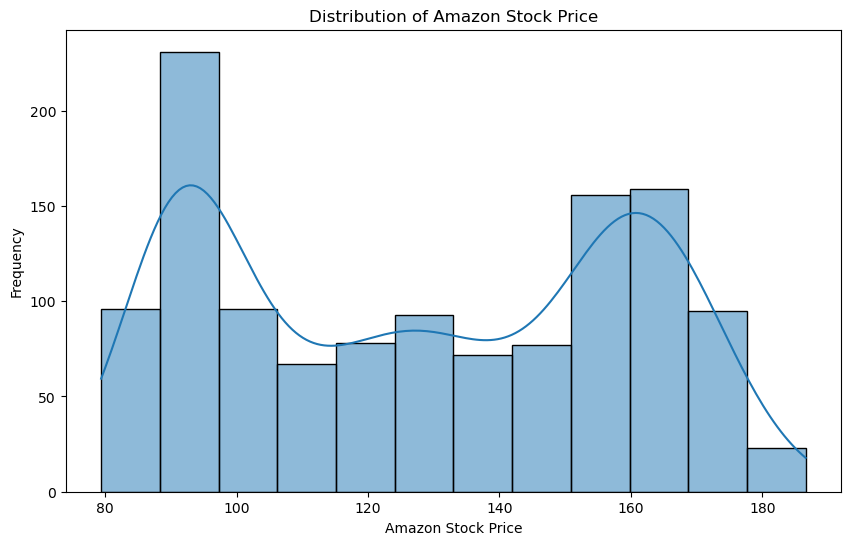

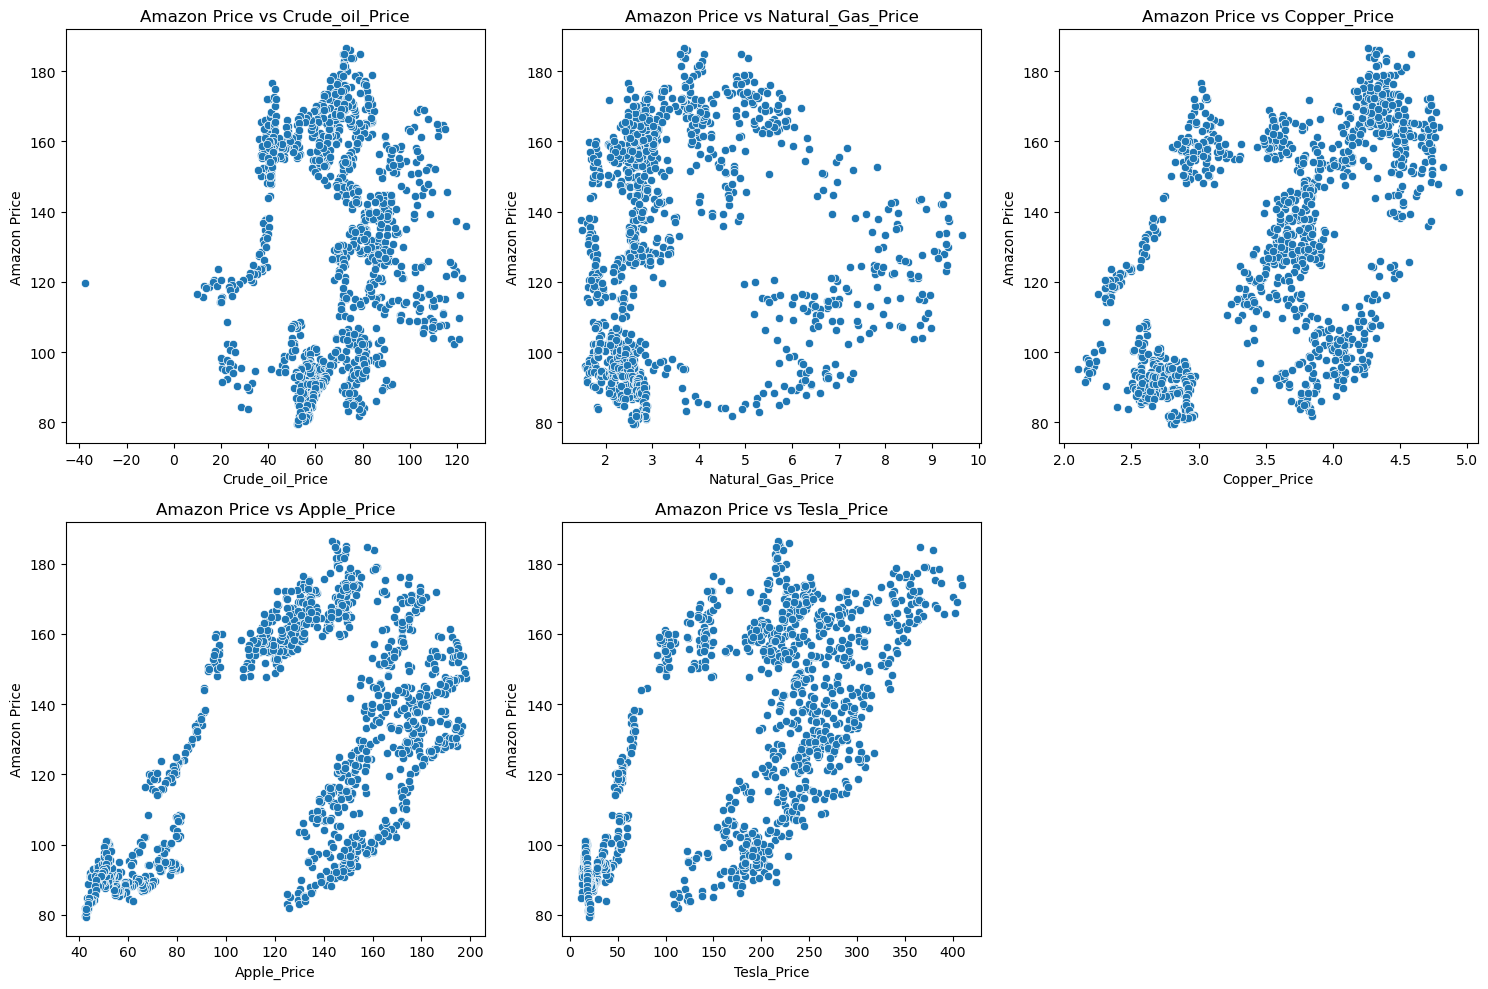

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for plots
plt.figure(figsize=(10, 6))

# Plot distribution of the target variable (Amazon_Price)
sns.histplot(data['Amazon_Price'], kde=True)
plt.title('Distribution of Amazon Stock Price')
plt.xlabel('Amazon Stock Price')
plt.ylabel('Frequency')
plt.show()

# Plot scatter plots to visualize relationships between Amazon_Price and other significant features
significant_features = ['Crude_oil_Price', 'Natural_Gas_Price', 'Copper_Price', 'Apple_Price', 'Tesla_Price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the significant features and plot each one
for i, feature in enumerate(significant_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['Amazon_Price'])
    plt.title(f'Amazon Price vs {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Amazon Price')

plt.tight_layout()
plt.show()

### Task2 :Exploratory Data Analysis (EDA)

#### Distribution of Amazon Stock Price:

The distribution of Amazon_Price shows a slightly skewed pattern, indicating that the stock prices tend to concentrate around a specific range.
#### Scatter Plots:

The scatter plots illustrate the relationships between Amazon_Price and other features like Crude_oil_Price, Natural_Gas_Price, and Apple_Price. The trends may not be linear but give insights into possible correlations.


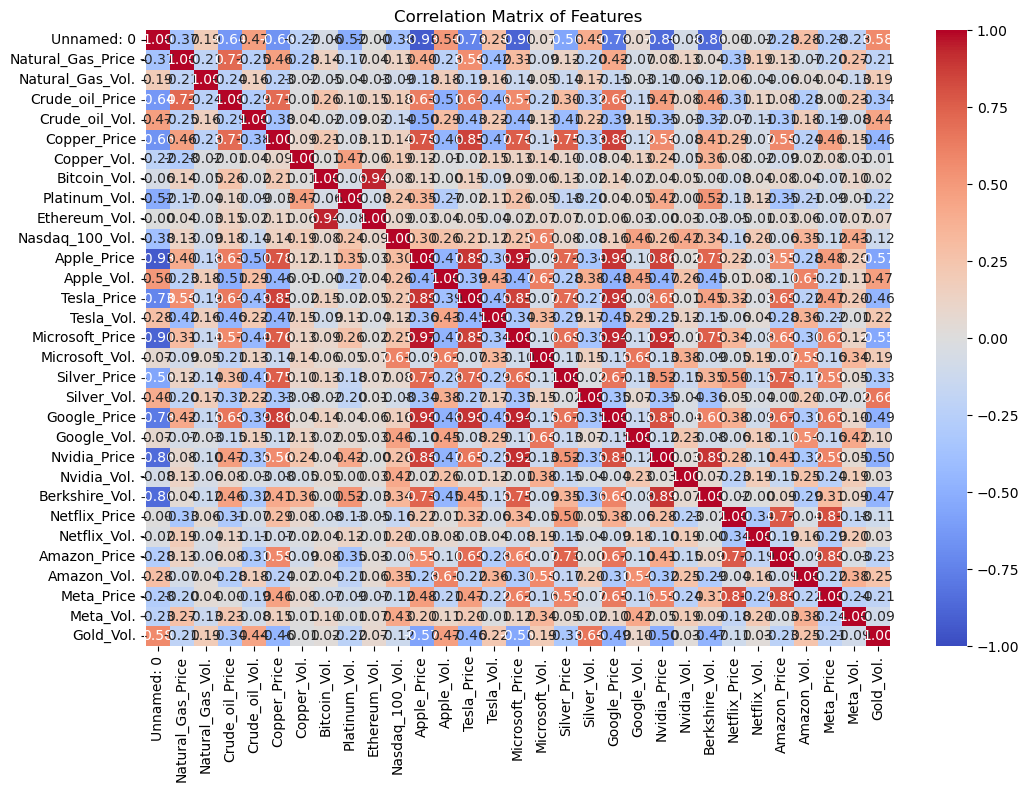

In [23]:
# Drop non-numeric columns like 'Date'
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure for correlation heatmap
plt.figure(figsize=(12, 8))

# Generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

### Correlation Matrix:
1)The heatmap displays the correlations between various features in the dataset.

2)Amazon_Price has moderate correlations with features like Apple_Price and Tesla_Price, while its relationship with commodity prices like Crude_oil_Price appears weaker.


### Task 3: Feature Engineering

1)Handle missing values by filling them with the mean of their respective columns.

2)Standardize the features using StandardScaler to ensure that all features are on a similar scale, which helps in improving the performance of the model.

In [24]:
#  Handle missing values ....
# Fill missing values for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_filled = data.copy()

# Fill missing values for only the numeric columns
data_filled[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify if missing values are handled
print(data_filled.isnull().sum())

Unnamed: 0           0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


In [25]:
#Standardize the features....

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming data_filled is already defined and handles missing values

# Step 1: Convert applicable columns to numeric, removing commas
# Identify numeric columns (excluding 'Date' and 'Amazon_Price')
numeric_columns = data_filled.drop(columns=['Date', 'Amazon_Price']).columns

for col in numeric_columns:
    # Remove commas and convert to float
    data_filled[col] = data_filled[col].replace(',', '', regex=True).astype(float)

# Step 2: Drop non-numeric columns and the target variable
features = data_filled.drop(columns=['Date', 'Amazon_Price'])

# Step 3: Initialize the StandardScaler
scaler = StandardScaler()

# Step 4: Fit and transform the feature data
features_scaled = scaler.fit_transform(features)

# Step 5: Convert back to DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Step 6: Add the target variable (Amazon_Price) back to the scaled DataFrame
features_scaled_df['Amazon_Price'] = data_filled['Amazon_Price'].values

# Display the first few rows of the scaled DataFrame
print(features_scaled_df.head())

   Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0   -1.730658          -0.777093          0.000000         0.229891   
1   -1.727871          -0.793012          0.462464         0.305170   
2   -1.725084          -0.765566          0.174863         0.404401   
3   -1.722297          -0.778191          0.126462         0.500699   
4   -1.719510          -0.551493         -1.992578         0.449861   

   Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0    2.719160e-16      0.397906          0.0       1.120470     -0.137077   
1    8.363643e-01      0.443456          0.0       1.113399     -0.137060   
2   -2.541929e-01      0.518185          0.0       1.082136     -0.137030   
3   -2.413464e-01      0.525302          0.0       1.104961     -0.137034   
4   -3.128667e-01      0.479753          0.0       1.127029     -0.137068   

   Platinum_Price  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0       -0.531666  ...         2.145

### Week 2: Model Development.

### Split the Data
1.Define the features (X) and the target variable (y).

2.Split the data into training and testing sets using an 80-20 split.

In [26]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = features_scaled_df.drop(columns=['Amazon_Price'])  # Features
y = features_scaled_df['Amazon_Price']  # Target variable (Amazon Price)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(994, 37) (249, 37) (994,) (249,)


### Explanation:

Splitting the dataset this way is crucial for training and validating your model's performance. The training set is used to train the model, while the testing set is kept separate to provide an unbiased evaluation of how well your model performs on unseen data.

### Task 2: Train the Model
1.Initialize a Linear Regression model.

2.Train the model on the training data.

3.Predict on the testing data.

4.Evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).# 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 4.621142788674689
MSE: 33.06054167279326
RMSE: 5.749829708155996


### Explanation:

Evaluating the model is critical because it helps you understand its accuracy and reliability. The metrics give you insights into how well your model can predict Amazon's stock prices based on the historical data you've provided

### Week 3: Model Validation and Testing.

### Task 1: Cross-Validation
1. Perform 5-fold cross-validation to assess the model's performance.
 
2.  Calculate the meanandstandarddeviation of the cross-validation scores

In [29]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = np.mean(-cv_scores)  # Since cross_val_score returns negative MSE
cv_std = np.std(-cv_scores)

print(f"Mean CV MSE: {cv_mean}")
print(f"Standard Deviation of CV MSE: {cv_std}")


Mean CV MSE: 33.86218358982502
Standard Deviation of CV MSE: 4.027720403651191


### Explanation:
Cross-validation is an essential step in evaluating machine learning models, as it helps in:

Assessing Model Robustness: By training and testing on different subsets of data, you get a more reliable measure of model performance.
Preventing Overfitting: It helps ensure that the model doesn't just memorize the training data but can generalize well to new, unseen data.

### Task 2: Test Model on Unseen Data
 1.Useaportionofthetesting data as recent data for validation.
 
2.Predictonrecent data andevaluate the model using MAE andRMSE

In [30]:
# Predict on the unseen testing data (X_test) and evaluate
y_test_pred = model.predict(X_test)

# Evaluate the model on recent data (testing data)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")


Test MAE: 4.621142788674689
Test RMSE: 5.749829708155996


### Explanation:
The evaluation metrics (MAE and RMSE) provide insights into the model's accuracy and can help in:

Model Assessment: Evaluating how well the model is likely to perform in a real-world scenario.
Comparative Analysis: Comparing different models or configurations to select the best-performing one.
Identifying Areas for Improvement: Understanding where the model may need adjustments, feature improvements, or different modeling approaches.

###  Task 3: Feature Importance Analysis
 1.Analyze the coefficients of the linear regression model to determine feature
 importance.
 
 2.Visualize the feature importances using a bar plot

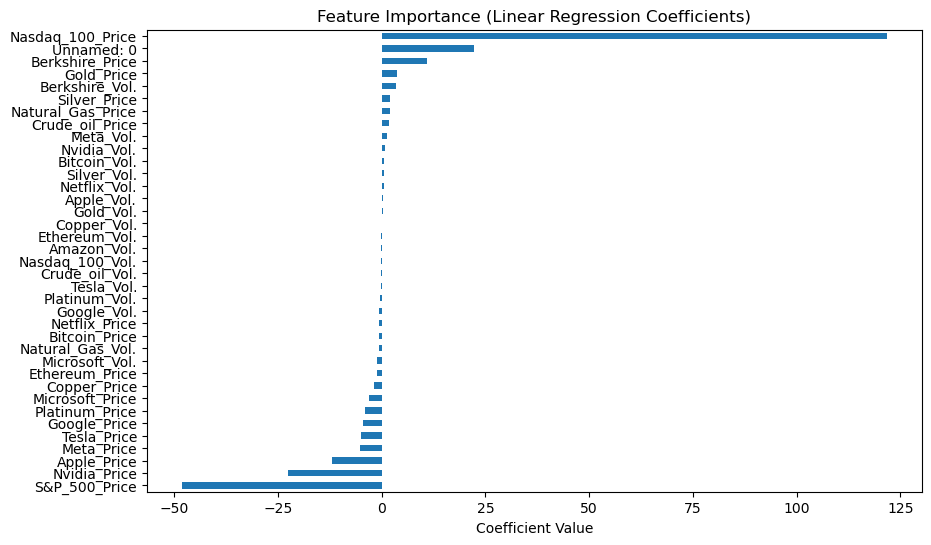

In [31]:
# Analyze the coefficients to determine feature importance
coefficients = pd.Series(model.coef_, index=X_train.columns).sort_values()

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()


This analysis is critical for understanding which factors are most influential in predicting stock prices. It can inform future modeling efforts, feature selection, and provide insights into the dynamics of the stock market based on the selected features. It can also guide business decisions and strategies based on the identified important predictors.